Notebook for generating pathways and figures for Richards' et al manuscript.

*Confirmed on 6/26/23 that code runs on google colab (PKH)
Notebook prepared by GSR.*

In [81]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 13 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail-common amd64 2.24.32-4ub

In [82]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=184245 sha256=205dffe84de6fa2084926a7d463c053962db369ddc04fd926a922427886451ee
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz


In [83]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from functools import reduce
from tabulate import tabulate
from operator import itemgetter, attrgetter
import graphviz
import pygraphviz as pgv
import yaml
import os

Needs pygraphviz for visualization, but all else works

In [84]:
!pip3 install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import networkx as nx
nx.__version__

'3.1'

In [86]:
### Load data
# current directory path
#input_dir = "C:/Users/Geraldine Desktop/OneDrive - Loyola University Chicago/Documents/PKH22/trial"
input_dir = os.getcwd()

In [87]:
# load network data from file
def list_edges(file):
    sif_file = open(input_dir + "/" + file, 'r')
    line_list = []
    for line in sif_file:
        #print(line)
        line_item = line.strip().split('\t')
        line_list.append(line_item)
        #print(line_list)
    #print(line_list)
    a_line = np.array(line_list)
    #a_line
    a_line[0:,1] = np.where(a_line[0:,1]=='up-regulates',1,-1)
    #print(a_line)
    #create list of 3-tuple edges from network data
    network = [(a_line[i,0], a_line[i,2], {'interaction':a_line[i,1]}) for i in range(len(line_list))]
    #print(network)
    return network

In [88]:
# convert to agraph and change color & shape of arrow
def agraph_color(network):
    # convert to pgv graph
    G = nx.nx_agraph.to_agraph(network)
    for u,v in G.edges():
        z = G.get_edge(u,v)
        if z.attr["interaction"] == '-1':
            z.attr["color"] = 'red'
            z.attr["arrowhead"] ="tee"
        else:
            z.attr["color"] = 'black'
    return G

In [89]:
def pos_neg(path):
    sg = newDG2.subgraph(path)
    z = [int(e[2]['interaction']) for e in sg.edges(data=True)]
    result = reduce((lambda a, b:a*b), z)
    inh = 'inhibit' if result==-1 else 'promote'
    return inh

In [90]:
def get_inh(path, network):
    inter_list = [int(network[path[i]][path[i+1]]['interaction']) for i in range(len(p)-1)]
    result = reduce((lambda a, b:a*b), inter_list)
    inh = 'inhibit' if result==-1 else 'promote'
    return inh

In [91]:
#load network
x = list_edges('networkExtended-looped4.txt')
#x

In [92]:
#Create directional graph using network
X = nx.DiGraph(x)

In [93]:
list(X.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('CCR5', 'GNAI1', {'interaction': '1'}),
 ('CCR1', 'GNAI1', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'GNAI1', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('JAK2', 'STAT6', {'interaction': '1'}),
 ('JAK2', 'STAT3', {'interaction': '1'}),
 ('GNAI1', 'PI3K', {'interaction': '1'}),
 ('GNAI1', 'Gbg', {'interaction': '1'}),
 ('GNAI1', 'ADYC', {'interaction': '-1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('GRB2', 'SOS1', {'interaction': '1'}),
 ('EGF', 'EGFR', {'interaction': '1'}),
 ('HRAS', 'BRAF', {'interaction': '1'}),
 ('BRAF', 'MEK1/2', {'interaction': '1'}),
 ('SOS1', 'NRAS', {'interaction': '1'}),
 ('NRAS', 'BRAF', {'interaction': '1'}),
 

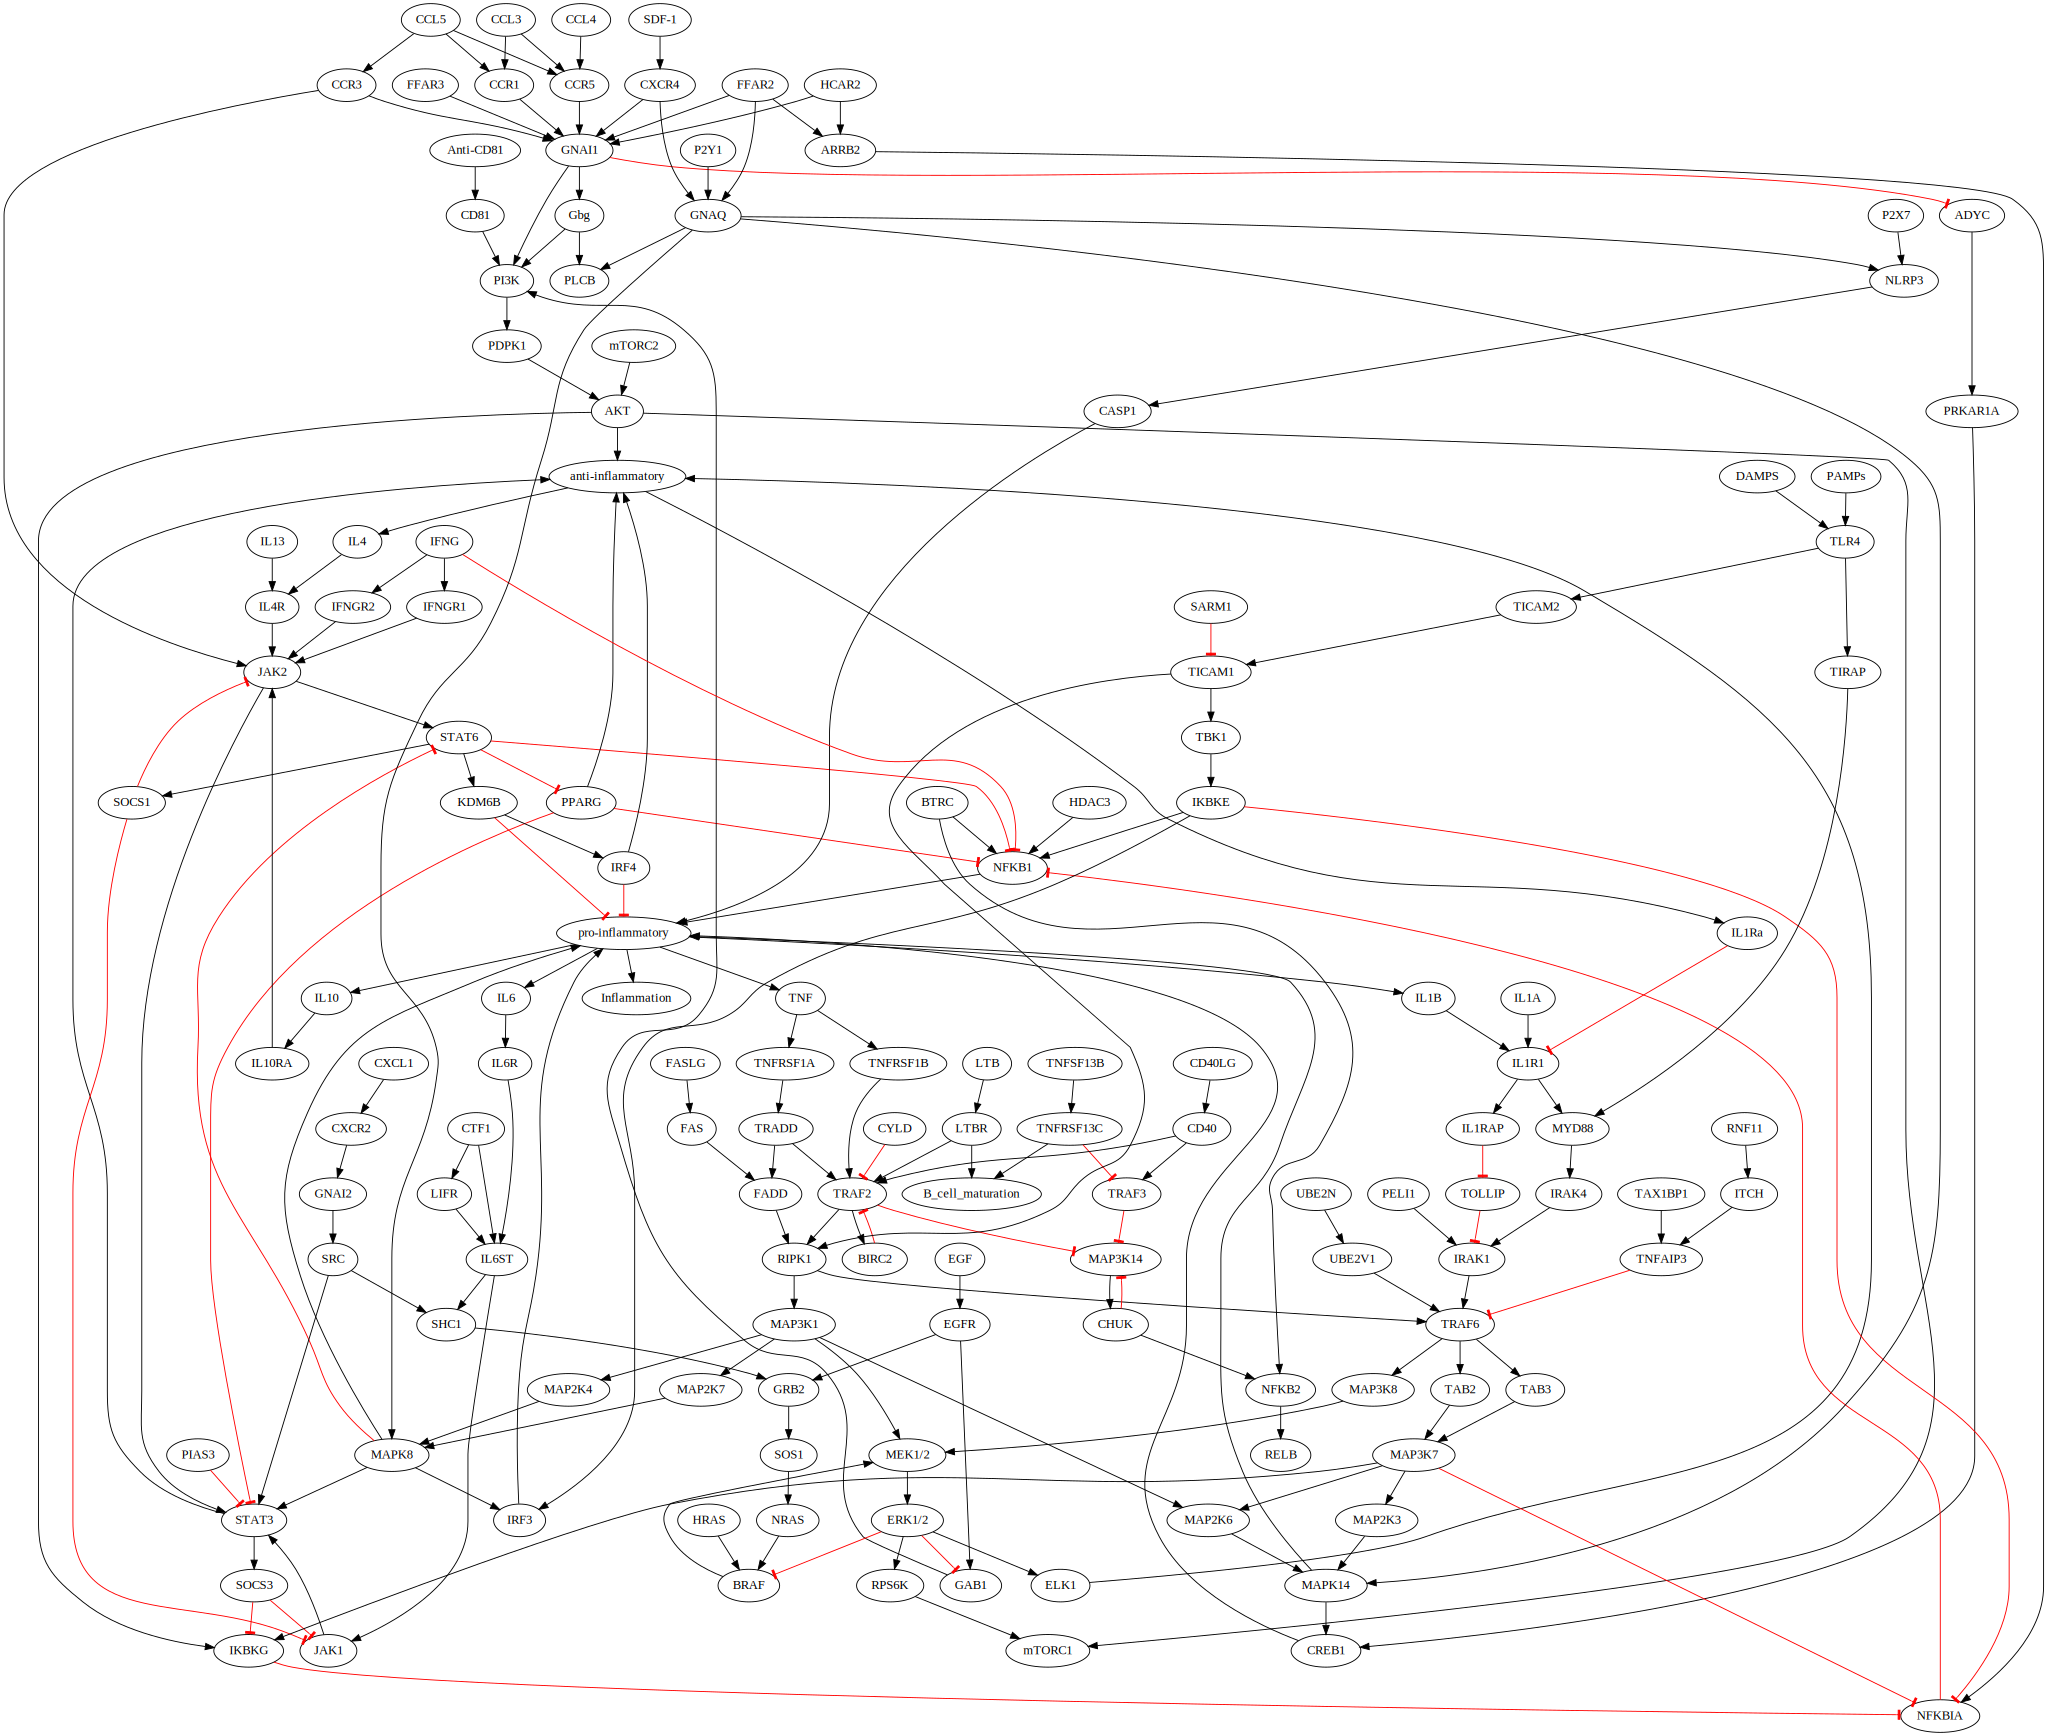

In [94]:
#show graph
aX = agraph_color(X)
aX.layout('dot')
aX

In [95]:
#load network
y = list_edges('networkExtended_edit3.txt')
#y

In [96]:
#Create directional graph using network
Y = nx.DiGraph(y)

In [97]:
list(Y.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('CCR5', 'Gai', {'interaction': '1'}),
 ('CCR1', 'Gai', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'Gai', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('JAK2', 'STAT6', {'interaction': '1'}),
 ('JAK2', 'STAT3', {'interaction': '1'}),
 ('Gai', 'PI3K', {'interaction': '1'}),
 ('Gai', 'Gbg', {'interaction': '1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('PI3K', 'SGK1', {'interaction': '1'}),
 ('PI3K', 'RAC1', {'interaction': '1'}),
 ('PI3K', 'PIP3', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('GRB2', 'SOS1', {'interaction': '1'}),
 ('EGF', 'EGFR', {'interaction': '1'}),
 ('HRAS', 'BRAF', {'interaction': '1'}),
 ('BRAF', 'MEK1/2', {'interaction': '1'}),
 ('SOS1', 'NR

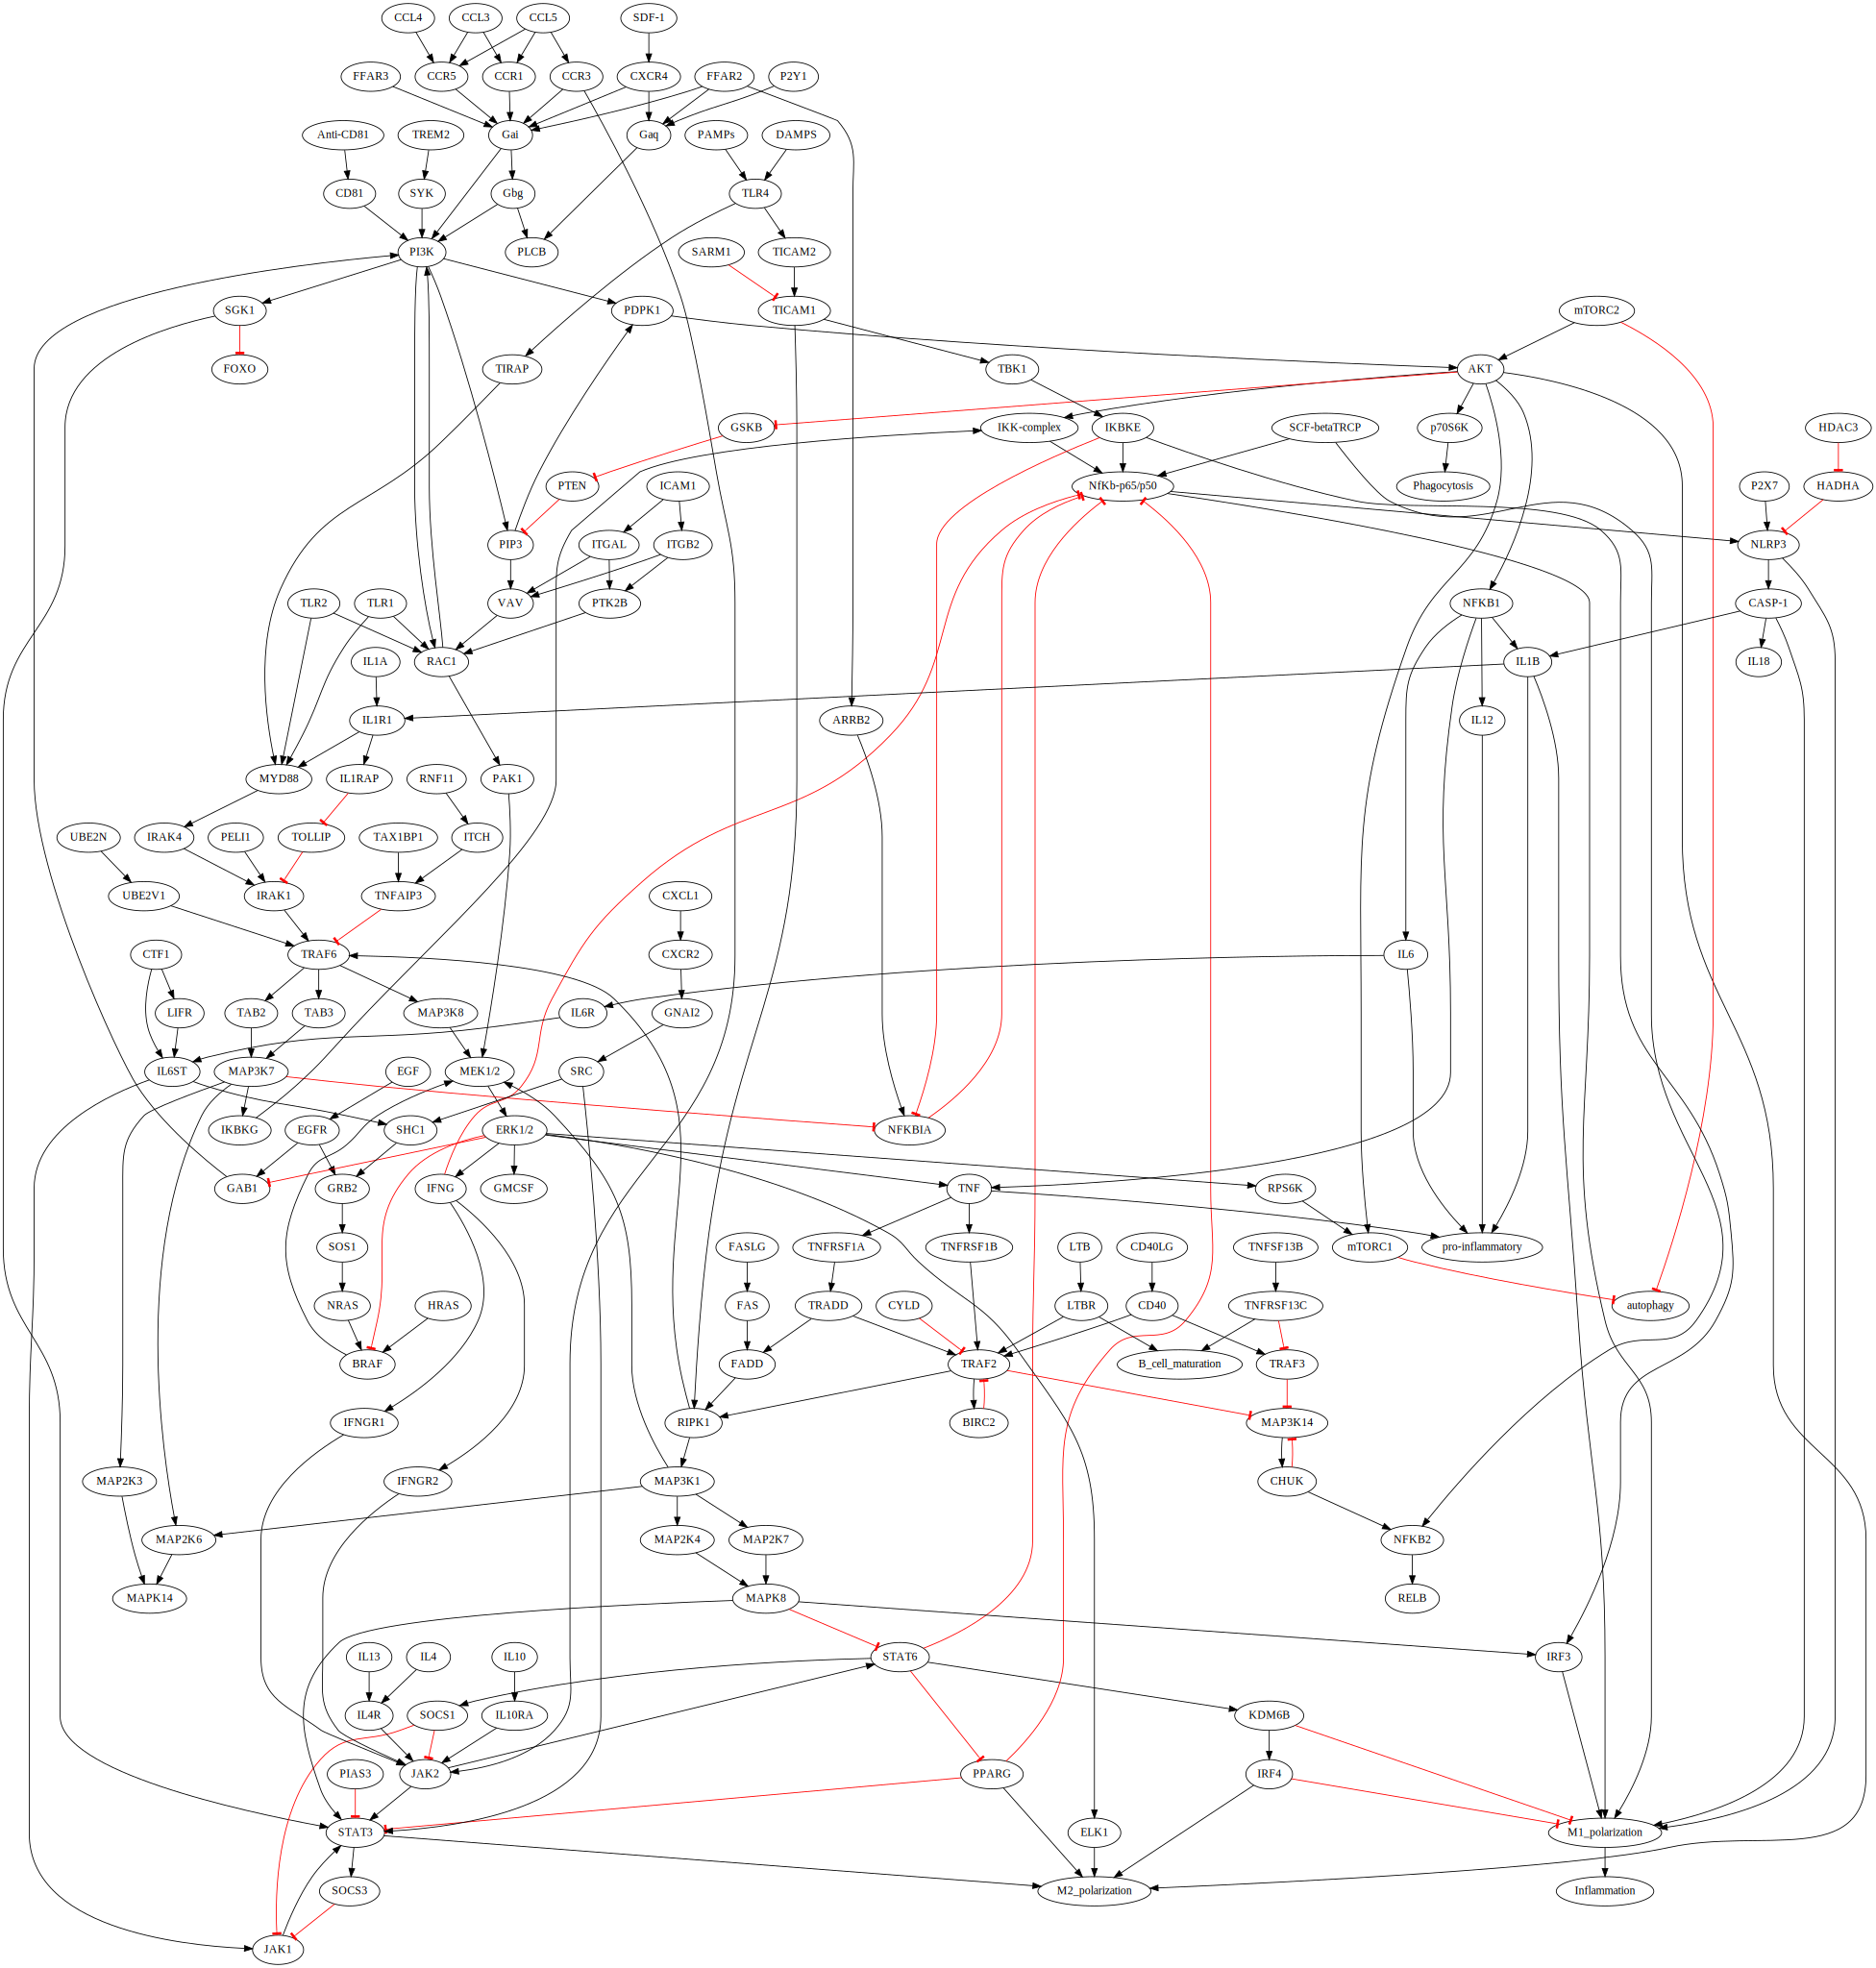

In [98]:
#show graph
aY = agraph_color(Y)
aY.layout('dot')
aY
# make an image file
#G.draw('G.png')

In [99]:
len(aY)

160

In [100]:
# create pic of network
#aY.draw('aY_23.png')

In [101]:
X.number_of_nodes()
X.number_of_edges()

202

In [102]:
Y.number_of_nodes()
Y.number_of_edges()

232

In [103]:
# combine 2 networks
z = x + y
z

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'GNAI1', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('EGF', 'EGFR', {'interaction': '1'}),
 ('HRAS', 'BRAF', {'interaction': '1'}),
 ('SOS1', 'NRAS', {'interaction': '1'}),
 ('mTORC2', 'AKT', {'interaction': '1'}),
 ('PDPK1', 'AKT', {'interaction': '1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('ERK1/2', 'GAB1', {'interaction': '-1'}),
 ('ERK1/2', 'RPS6K', {'interaction': '1'}),
 ('ERK1/2', 'ELK1', {'interaction': '1'}),
 ('ERK1/2', 'BRAF', {'interaction': '-1'}),
 ('RPS6K', 'mTORC1', {'interaction': '1'}),
 ('AKT', 'anti-inflammatory', {'interaction': '1'}),
 ('AKT', 'IKBKG', {'interaction': '1'}),
 ('AKT', 'mTORC1', {'int

In [104]:
Z = nx.DiGraph(z)

In [105]:
Z.add_edges_from(Y.edges)

In [106]:
list(Z.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('CCR5', 'GNAI1', {'interaction': '1'}),
 ('CCR5', 'Gai', {'interaction': '1'}),
 ('CCR1', 'GNAI1', {'interaction': '1'}),
 ('CCR1', 'Gai', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'GNAI1', {'interaction': '1'}),
 ('CCR3', 'Gai', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('JAK2', 'STAT6', {'interaction': '1'}),
 ('JAK2', 'STAT3', {'interaction': '1'}),
 ('GNAI1', 'PI3K', {'interaction': '1'}),
 ('GNAI1', 'Gbg', {'interaction': '1'}),
 ('GNAI1', 'ADYC', {'interaction': '-1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('PI3K', 'SGK1', {'interaction': '1'}),
 ('PI3K', 'RAC1', {'interaction': '1'}),
 ('PI3K', 'PIP3', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('GR

In [107]:
Z.number_of_nodes()
Z.number_of_edges()

286

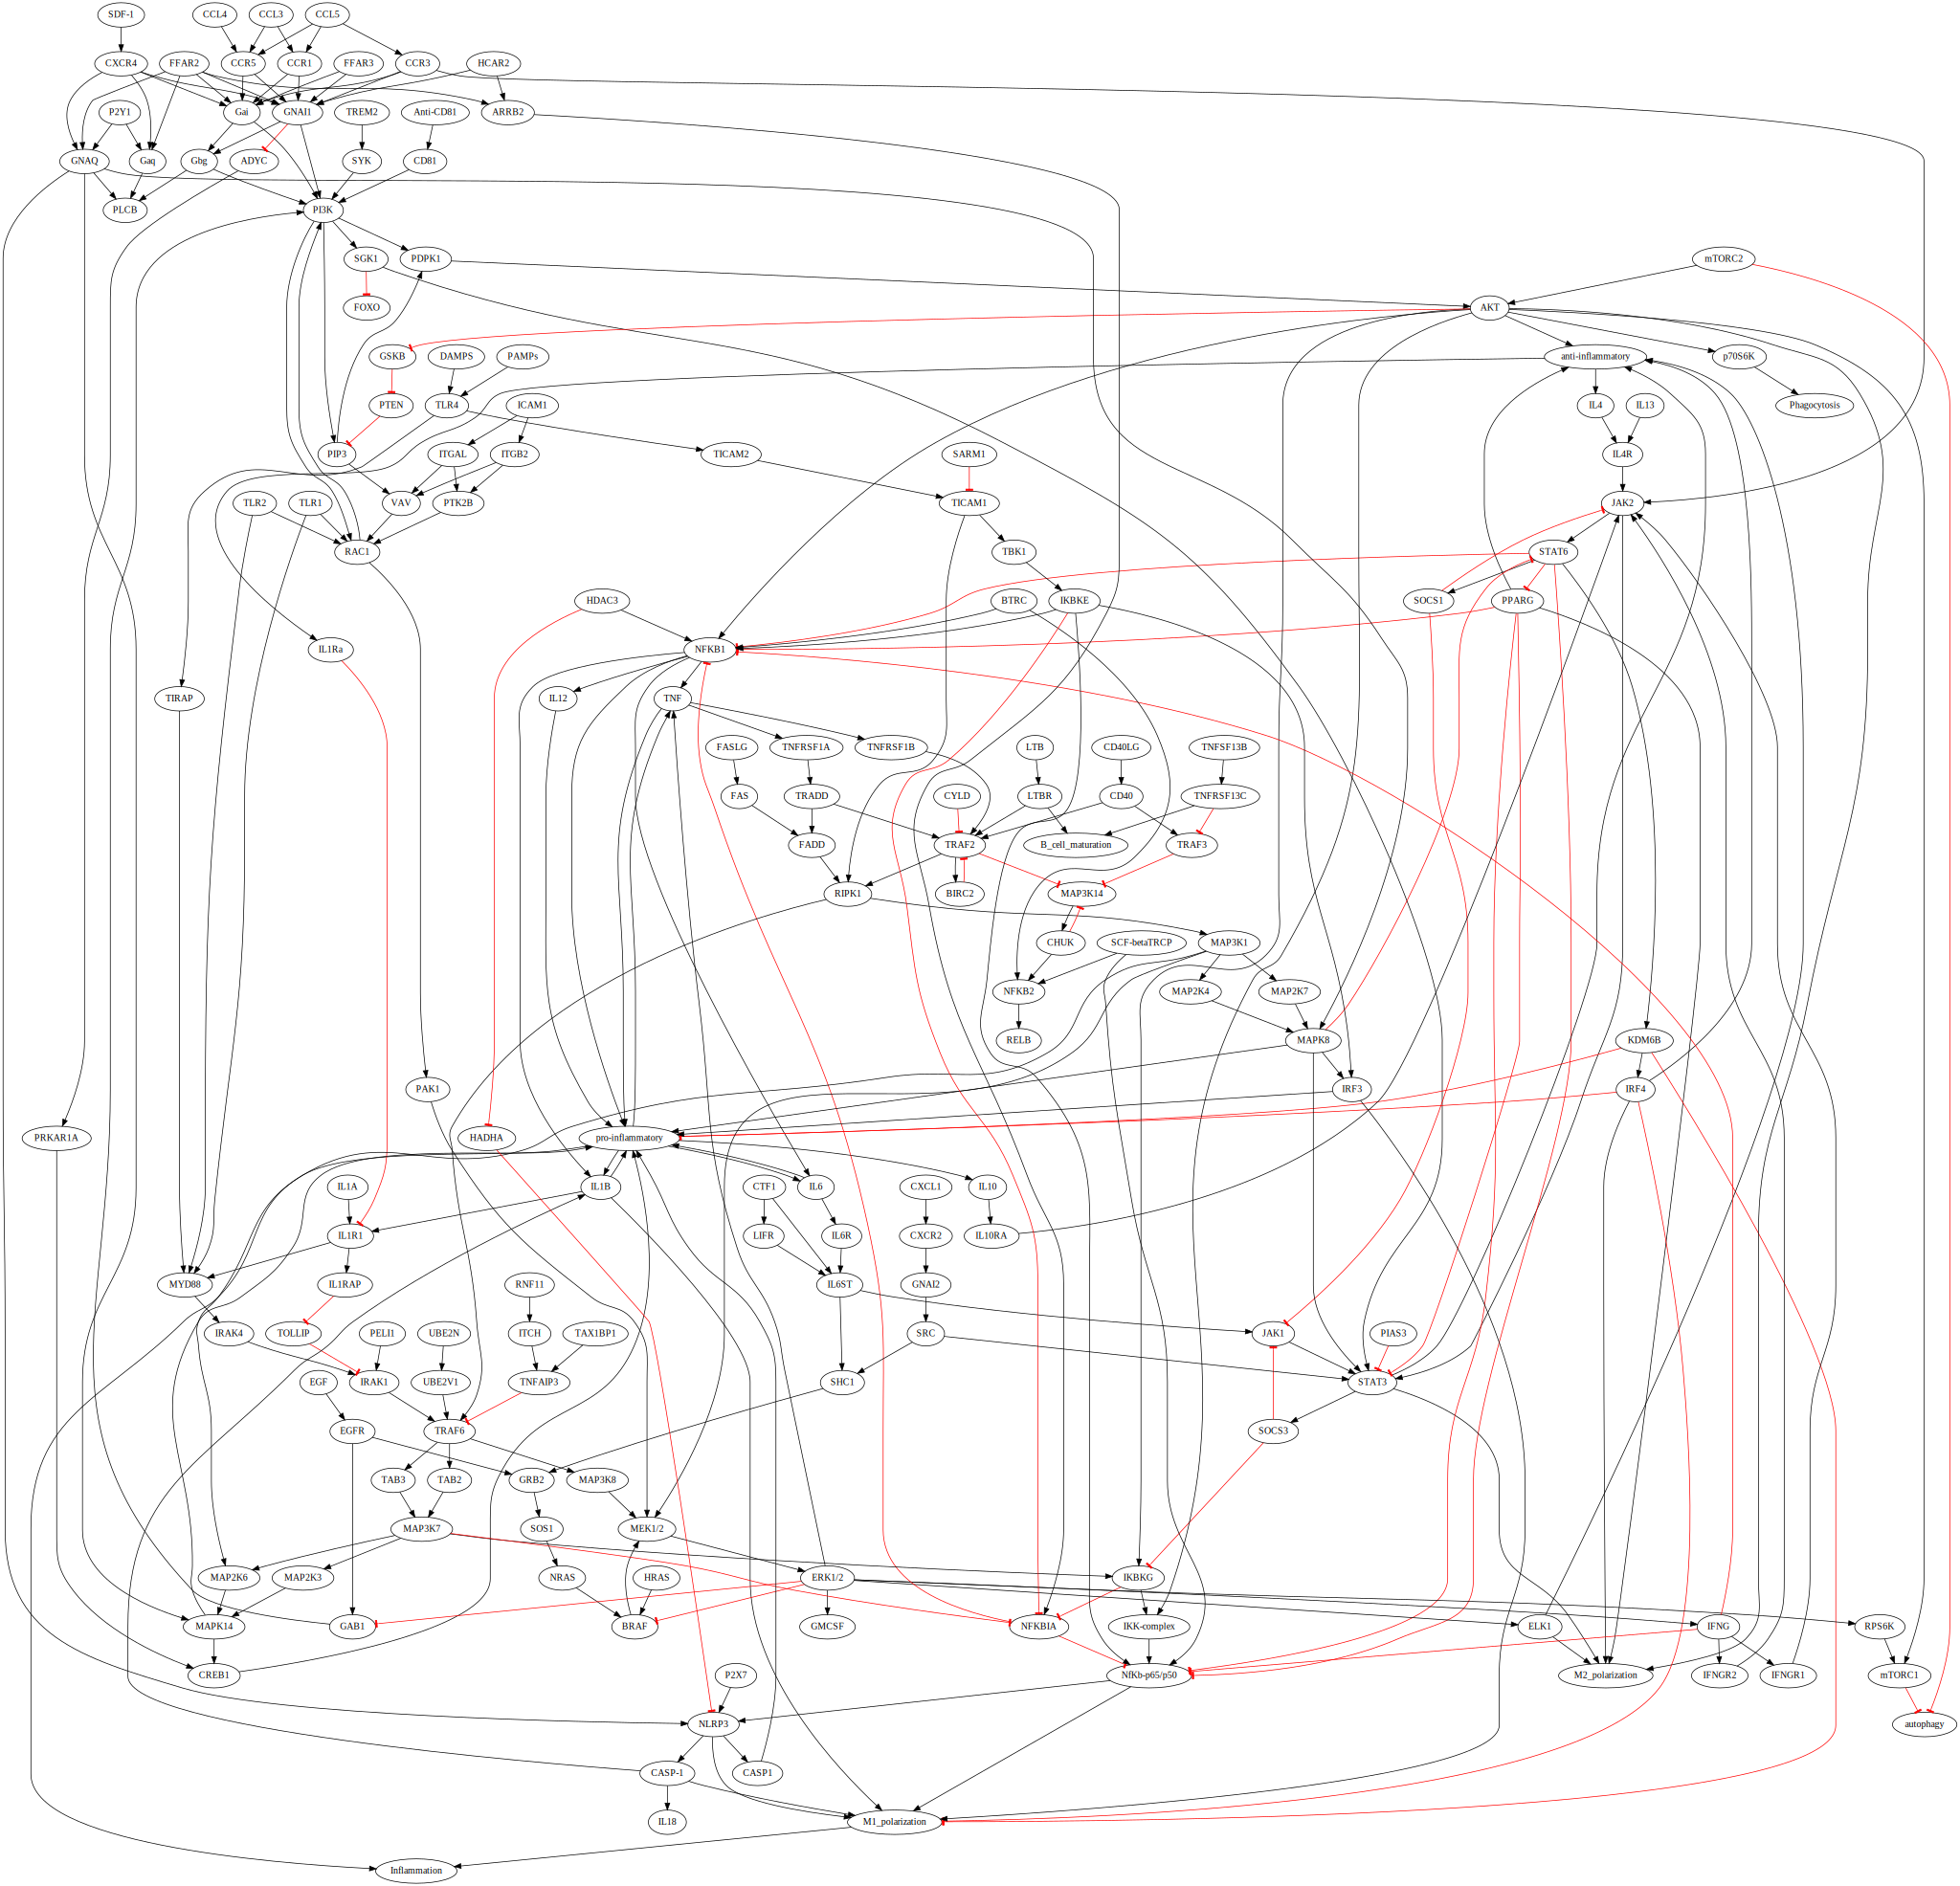

In [108]:
aZ = agraph_color(Z)
aZ.layout('dot')
aZ
# make an image file
#aZ.draw('aZ.png')

In [109]:
list(Z.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('CCR5', 'GNAI1', {'interaction': '1'}),
 ('CCR5', 'Gai', {'interaction': '1'}),
 ('CCR1', 'GNAI1', {'interaction': '1'}),
 ('CCR1', 'Gai', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'GNAI1', {'interaction': '1'}),
 ('CCR3', 'Gai', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('JAK2', 'STAT6', {'interaction': '1'}),
 ('JAK2', 'STAT3', {'interaction': '1'}),
 ('GNAI1', 'PI3K', {'interaction': '1'}),
 ('GNAI1', 'Gbg', {'interaction': '1'}),
 ('GNAI1', 'ADYC', {'interaction': '-1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('PI3K', 'SGK1', {'interaction': '1'}),
 ('PI3K', 'RAC1', {'interaction': '1'}),
 ('PI3K', 'PIP3', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('GR

In [110]:
# Create new network using y network above to put node data

In [111]:
newDG2 = nx.DiGraph(Z)

In [112]:
newDG2 = nx.DiGraph(Z)
nx.set_node_attributes(newDG2, 0, 'fc')
nx.set_node_attributes(newDG2, 0, 'pval')
nx.set_node_attributes(newDG2, 0, 'ab')
nx.set_node_attributes(newDG2, 0, 'pab')
list(newDG2.nodes(data=True))

[('CCL5', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CCR5', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CCR1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CCR3', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('Anti-CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('JAK2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('GNAI1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('PI3K', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('EGFR', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('GAB1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('GRB2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('EGF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('HRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('BRAF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('SOS1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('NRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('mTORC2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('AKT', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('PDP

Load new RNA data M1 vs M2 fdr 10%

In [113]:
rna_m1m2fdr10 = pd.read_csv(input_dir + "/" + 'm1m2fdr10.csv')
rna_m1m2fdr10

,Gene.symbol,adj.P.Val,logFC
0,GBP5,0.000912,7.40
1,GBP4,0.000912,7.29
2,CXCL13,0.000912,7.15
3,CCR7,0.000912,7.08
4,IFI44L,0.000912,6.16
...,...,...,...
1439,MYO1G,0.099680,1.93
1440,GCSHP3,0.099693,-1.91
1441,AMDHD1,0.099694,-2.52
1442,LILRA3,0.099694,2.24


In [114]:
rna_m1m2fdr10['logFC']

0       7.40
1       7.29
2       7.15
3       7.08
4       6.16
        ... 
1439    1.93
1440   -1.91
1441   -2.52
1442    2.24
1443    1.68
Name: logFC, Length: 1444, dtype: float64

In [115]:
# make list of 3-tuple from rna data
rna_m1m2fdr10_list = [(rna_m1m2fdr10['Gene.symbol'][i], rna_m1m2fdr10['adj.P.Val'][i], rna_m1m2fdr10['logFC'][i])  for i in range(len(rna_m1m2fdr10))]
#rna_m1m2fdr10_list

In [116]:
#create an rna dictionary to put the gene name, adj. p-value and fold change value
rna_dict3 = {}
for rna_tuple in rna_m1m2fdr10_list:
    rna_dict3[rna_tuple[0]] = {'pval':rna_tuple[1], 'fc':rna_tuple[2]}
#rna_dict3

In [117]:
# put rna data into nodes in network
nx.set_node_attributes(newDG2, rna_dict3)
list(newDG2.nodes(data=True))

[('CCL5', {'fc': 5.85, 'pval': 0.001928, 'ab': 0, 'pab': 0}),
 ('CCR5', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CCR1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CCR3', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('Anti-CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('JAK2', {'fc': 2.67, 'pval': 0.051366, 'ab': 0, 'pab': 0}),
 ('GNAI1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('PI3K', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('EGFR', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('GAB1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('GRB2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('EGF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('HRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('BRAF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('SOS1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('NRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('mTORC2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0}),
 ('AKT', {'fc': 0, 'pval': 0, 'ab': 0

In [118]:
#create a ranked list

In [119]:
#1st, reverse order
rev_rna_list = list(reversed(rna_m1m2fdr10_list))
#rev_rna_list

In [120]:
scores = [item[1] for item in rev_rna_list]
#scores

In [121]:
ranks = []
for s in scores:
    ranks.append(scores.index(s)+1)
#ranks

In [122]:
len(scores)

1444

In [123]:
len(ranks)

1444

In [124]:
#create an rna dictionary to put the gene name and rank
gene_rank = {}
for i in range(len(rna_m1m2fdr10_list)):
    gene_rank[rna_m1m2fdr10_list[i][0]] = {'rank':ranks[i]}
gene_rank

{'GBP5': {'rank': 1},
 'GBP4': {'rank': 1},
 'CXCL13': {'rank': 1},
 'CCR7': {'rank': 4},
 'IFI44L': {'rank': 5},
 'CGNL1': {'rank': 5},
 'GBP7': {'rank': 7},
 'IDO1': {'rank': 8},
 'TNFAIP6': {'rank': 8},
 'SLAMF1': {'rank': 10},
 'MAF': {'rank': 11},
 'LAG3': {'rank': 12},
 'SLCO5A1': {'rank': 13},
 'GBP1': {'rank': 14},
 'SRSF12': {'rank': 15},
 'CDC42EP2': {'rank': 16},
 'FAM26F': {'rank': 17},
 'ABTB2': {'rank': 17},
 'SOCS1': {'rank': 19},
 'ISG20': {'rank': 19},
 'SLAMF7': {'rank': 19},
 'ETV7': {'rank': 19},
 'LAMP3': {'rank': 19},
 'TAP1': {'rank': 19},
 'BCL2L14': {'rank': 19},
 'LINC01093': {'rank': 19},
 'C1R': {'rank': 19},
 'SAA1': {'rank': 19},
 'ELOVL7': {'rank': 29},
 'LINC00158': {'rank': 30},
 'ADAM19': {'rank': 31},
 'GUCY1A3': {'rank': 32},
 'CCL5': {'rank': 33},
 'C11orf96': {'rank': 34},
 'G0S2': {'rank': 35},
 'IL15RA': {'rank': 35},
 'ADORA2A': {'rank': 37},
 'LINC01539': {'rank': 37},
 'MAP3K13': {'rank': 37},
 'GCH1': {'rank': 37},
 'LDLRAD4': {'rank': 37},
 

In [125]:
rna_m1m2fdr10_list[0][0]

'GBP5'

In [126]:
#initialize network before putting rank as node data
nx.set_node_attributes(newDG2, 0, 'rank')
list(newDG2.nodes(data=True))

[('CCL5', {'fc': 5.85, 'pval': 0.001928, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CCR5', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CCR1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CCR3', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('Anti-CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('JAK2', {'fc': 2.67, 'pval': 0.051366, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('GNAI1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('PI3K', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('EGFR', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('GAB1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('GRB2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('EGF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('HRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('BRAF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('SOS1', {'fc': 0, 'pval': 0,

In [127]:
# add rank in the network nodes
nx.set_node_attributes(newDG2, gene_rank)
list(newDG2.nodes(data=True))

[('CCL5', {'fc': 5.85, 'pval': 0.001928, 'ab': 0, 'pab': 0, 'rank': 33}),
 ('CCR5', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CCR1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CCR3', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('Anti-CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('CD81', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('JAK2', {'fc': 2.67, 'pval': 0.051366, 'ab': 0, 'pab': 0, 'rank': 802}),
 ('GNAI1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('PI3K', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('EGFR', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('GAB1', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('GRB2', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('EGF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('HRAS', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('BRAF', {'fc': 0, 'pval': 0, 'ab': 0, 'pab': 0, 'rank': 0}),
 ('SOS1', {'fc': 0, 'pval':

In [128]:
newDG2_nlist = list(newDG2.nodes(data=True))
#newDG2_nlist

In [129]:
list(newDG2.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1'}),
 ('CCL5', 'CCR1', {'interaction': '1'}),
 ('CCL5', 'CCR3', {'interaction': '1'}),
 ('CCR5', 'GNAI1', {'interaction': '1'}),
 ('CCR5', 'Gai', {'interaction': '1'}),
 ('CCR1', 'GNAI1', {'interaction': '1'}),
 ('CCR1', 'Gai', {'interaction': '1'}),
 ('CCR3', 'JAK2', {'interaction': '1'}),
 ('CCR3', 'GNAI1', {'interaction': '1'}),
 ('CCR3', 'Gai', {'interaction': '1'}),
 ('Anti-CD81', 'CD81', {'interaction': '1'}),
 ('CD81', 'PI3K', {'interaction': '1'}),
 ('JAK2', 'STAT6', {'interaction': '1'}),
 ('JAK2', 'STAT3', {'interaction': '1'}),
 ('GNAI1', 'PI3K', {'interaction': '1'}),
 ('GNAI1', 'Gbg', {'interaction': '1'}),
 ('GNAI1', 'ADYC', {'interaction': '-1'}),
 ('PI3K', 'PDPK1', {'interaction': '1'}),
 ('PI3K', 'SGK1', {'interaction': '1'}),
 ('PI3K', 'RAC1', {'interaction': '1'}),
 ('PI3K', 'PIP3', {'interaction': '1'}),
 ('EGFR', 'GAB1', {'interaction': '1'}),
 ('EGFR', 'GRB2', {'interaction': '1'}),
 ('GAB1', 'PI3K', {'interaction': '1'}),
 ('GR

In [130]:
Zedgelist = list(Z.edges)
Zedgelist

[('CCL5', 'CCR5'),
 ('CCL5', 'CCR1'),
 ('CCL5', 'CCR3'),
 ('CCR5', 'GNAI1'),
 ('CCR5', 'Gai'),
 ('CCR1', 'GNAI1'),
 ('CCR1', 'Gai'),
 ('CCR3', 'JAK2'),
 ('CCR3', 'GNAI1'),
 ('CCR3', 'Gai'),
 ('Anti-CD81', 'CD81'),
 ('CD81', 'PI3K'),
 ('JAK2', 'STAT6'),
 ('JAK2', 'STAT3'),
 ('GNAI1', 'PI3K'),
 ('GNAI1', 'Gbg'),
 ('GNAI1', 'ADYC'),
 ('PI3K', 'PDPK1'),
 ('PI3K', 'SGK1'),
 ('PI3K', 'RAC1'),
 ('PI3K', 'PIP3'),
 ('EGFR', 'GAB1'),
 ('EGFR', 'GRB2'),
 ('GAB1', 'PI3K'),
 ('GRB2', 'SOS1'),
 ('EGF', 'EGFR'),
 ('HRAS', 'BRAF'),
 ('BRAF', 'MEK1/2'),
 ('SOS1', 'NRAS'),
 ('NRAS', 'BRAF'),
 ('mTORC2', 'AKT'),
 ('mTORC2', 'autophagy'),
 ('AKT', 'anti-inflammatory'),
 ('AKT', 'IKBKG'),
 ('AKT', 'mTORC1'),
 ('AKT', 'M2_polarization'),
 ('AKT', 'IKK-complex'),
 ('AKT', 'GSKB'),
 ('AKT', 'p70S6K'),
 ('AKT', 'NFKB1'),
 ('PDPK1', 'AKT'),
 ('ERK1/2', 'GAB1'),
 ('ERK1/2', 'RPS6K'),
 ('ERK1/2', 'ELK1'),
 ('ERK1/2', 'BRAF'),
 ('ERK1/2', 'TNF'),
 ('ERK1/2', 'GMCSF'),
 ('ERK1/2', 'IFNG'),
 ('RPS6K', 'mTORC1'),
 ('

In [131]:
#create function to calculate edge weight using gene_rank

In [132]:
def calc_wt(edge, gene_rank):
    node1 = edge[0]
    node2 = edge[1]
    node1_wt = gene_rank[node1]['rank'] if node1 in gene_rank else 0
    node2_wt = gene_rank[node2]['rank'] if node2 in gene_rank else 0
    #print(node1_wt, node2_wt)
    wt = (node1_wt + node2_wt)/2
    return wt

In [133]:
#add activating interactions weight

In [134]:
def get_inh(path, network):
    inter_list = [int(network[path[i]][path[i+1]]['interaction']) for i in range(len(p)-1)]
    result = reduce((lambda a, b:a*b), inter_list)
    inh = 'inhibit' if result==-1 else 'promote'
    return inh

In [135]:
def calc_inter_wt(edge, network):
    edge_inter = nx.get_edge_attributes(network, 'interaction')
    #edge_inter[edge]
    if int(edge_inter[edge]) > 0:
        i_wt = 1
    else:
        i_wt = 100
    return i_wt

In [136]:
calc_inter_wt(('CCL5', 'CCR5'), newDG2)

1

In [137]:
#initialize network to add 'i_wt' interactions weight

In [138]:
iwt_attr = {}
for edge in Zedgelist:
    #print(edge)
    iwt_attr[edge] = {'i_wt':calc_inter_wt(edge, newDG2)}
    #wt_attr.update = {(edge): {'wt':0}}
#print(iwt_attr)

In [139]:
#add activating interactions weight to network
nx.set_edge_attributes(newDG2, iwt_attr)
list(newDG2.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1', 'i_wt': 1}),
 ('CCL5', 'CCR1', {'interaction': '1', 'i_wt': 1}),
 ('CCL5', 'CCR3', {'interaction': '1', 'i_wt': 1}),
 ('CCR5', 'GNAI1', {'interaction': '1', 'i_wt': 1}),
 ('CCR5', 'Gai', {'interaction': '1', 'i_wt': 1}),
 ('CCR1', 'GNAI1', {'interaction': '1', 'i_wt': 1}),
 ('CCR1', 'Gai', {'interaction': '1', 'i_wt': 1}),
 ('CCR3', 'JAK2', {'interaction': '1', 'i_wt': 1}),
 ('CCR3', 'GNAI1', {'interaction': '1', 'i_wt': 1}),
 ('CCR3', 'Gai', {'interaction': '1', 'i_wt': 1}),
 ('Anti-CD81', 'CD81', {'interaction': '1', 'i_wt': 1}),
 ('CD81', 'PI3K', {'interaction': '1', 'i_wt': 1}),
 ('JAK2', 'STAT6', {'interaction': '1', 'i_wt': 1}),
 ('JAK2', 'STAT3', {'interaction': '1', 'i_wt': 1}),
 ('GNAI1', 'PI3K', {'interaction': '1', 'i_wt': 1}),
 ('GNAI1', 'Gbg', {'interaction': '1', 'i_wt': 1}),
 ('GNAI1', 'ADYC', {'interaction': '-1', 'i_wt': 100}),
 ('PI3K', 'PDPK1', {'interaction': '1', 'i_wt': 1}),
 ('PI3K', 'SGK1', {'interaction': '1', 'i_wt': 1}),

In [140]:
# Add node weights

In [141]:
#rna only
def node_wt_rna(u, v):
    rna_node1 = 1 if newDG2.nodes[u].get("fc", 0) > 0 else -1 if newDG2.nodes[u].get("fc", 0) < 0 else 0
    rna_node2 = 1 if newDG2.nodes[v].get("fc", 0) > 0 else -1 if newDG2.nodes[v].get("fc", 0) < 0 else 0
    node_u_wt = rna_node1
    node_v_wt = rna_node2
    edge_wt = newDG2.edges[u, v].get("i_wt", 1)
    return edge_wt - node_u_wt / 2 - node_v_wt / 2

In [142]:
#rna+ab
def node_wt_rna_ab(u, v):
    rna_node1 = 1 if newDG2.nodes[u].get("fc", 0) > 0 else -1 if newDG2.nodes[u].get("fc", 0) < 0 else 0
    rna_node2 = 1 if newDG2.nodes[v].get("fc", 0) > 0 else -1 if newDG2.nodes[v].get("fc", 0) < 0 else 0
    ab_node1 = 1 if 1 > newDG2.nodes[u].get("ab", 0) > 0 else -1 if newDG2.nodes[u].get("ab", 0) > 1 else 0
    ab_node2 = 1 if 1 > newDG2.nodes[v].get("ab", 0) > 0 else -1 if newDG2.nodes[v].get("ab", 0) > 1 else 0
    node_u_wt = (rna_node1 + ab_node1) / 2
    node_v_wt = (rna_node2 + ab_node2) / 2
    edge_wt = newDG2.edges[u, v].get("i_wt", 1)
    return edge_wt - node_u_wt / 2 - node_v_wt / 2

In [143]:
node_wt_rna('CCL5', 'CCR5')

0.5

In [144]:
node_wt_rna_ab('CCL5', 'CCR5')

0.75

In [145]:
#make dictionary to add edge+node(rna only) weights
iwt_rna_attr = {}
for edge in Zedgelist:
    iwt_rna_attr[edge] = {'iwt_rna':node_wt_rna(edge[0], edge[1])}
#print(iwt_rna_attr)

In [146]:
#add edge+node(rna only) weights
nx.set_edge_attributes(newDG2, iwt_rna_attr)
list(newDG2.edges(data=True))

[('CCL5', 'CCR5', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5}),
 ('CCL5', 'CCR1', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5}),
 ('CCL5', 'CCR3', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5}),
 ('CCR5', 'GNAI1', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CCR5', 'Gai', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CCR1', 'GNAI1', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CCR1', 'Gai', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CCR3', 'JAK2', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5}),
 ('CCR3', 'GNAI1', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CCR3', 'Gai', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('Anti-CD81', 'CD81', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('CD81', 'PI3K', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0}),
 ('JAK2', 'STAT6', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5}),
 ('JAK2', 'STAT3', {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.0}),
 ('GNAI1', 'PI3K', {'interaction': '1', '

In [147]:
#make dictionary to add edge+node(rna+ab) weights
iwt_rna_ab_attr = {}
for edge in Zedgelist:
    iwt_rna_ab_attr[edge] = {'iwt_rna_ab':node_wt_rna_ab(edge[0], edge[1])}
#print(iwt_rna_ab_attr)

In [148]:
#add edge+node(rna +ab) weights
nx.set_edge_attributes(newDG2, iwt_rna_ab_attr)
list(newDG2.edges(data=True))

[('CCL5',
  'CCR5',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5, 'iwt_rna_ab': 0.75}),
 ('CCL5',
  'CCR1',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5, 'iwt_rna_ab': 0.75}),
 ('CCL5',
  'CCR3',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5, 'iwt_rna_ab': 0.75}),
 ('CCR5',
  'GNAI1',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('CCR5',
  'Gai',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('CCR1',
  'GNAI1',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('CCR1',
  'Gai',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('CCR3',
  'JAK2',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 0.5, 'iwt_rna_ab': 0.75}),
 ('CCR3',
  'GNAI1',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('CCR3',
  'Gai',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab': 1.0}),
 ('Anti-CD81',
  'CD81',
  {'interaction': '1', 'i_wt': 1, 'iwt_rna': 1.0, 'iwt_rna_ab

In [149]:
# use ligandlist for receptor list

In [150]:
with open('ligandlist2.yaml', 'r') as file:
    ligandlist = yaml.safe_load(file)

In [151]:
ligandlist

{'CCR3': ['CCL5'],
 'CD40': ['CD40LG'],
 'CD81': ['Anti-CD81'],
 'EGFR': ['EGF'],
 'FAS': ['FASLG'],
 'IFNGR1': ['IFNG'],
 'IFNGR2': ['IFNG'],
 'IL10RA': ['IL10'],
 'IL1R1': ['IL1A', 'IL1B'],
 'IL4R': ['IL4'],
 'IL6R': ['IL6'],
 'LIFR': ['CTF1'],
 'LTBR': ['LTB'],
 'TLR4': ['PAMPs'],
 'TNFRSF13C': ['TNFSF13B'],
 'TNFRSF1A': ['TNF'],
 'TNFRSF1B': ['TNF'],
 'CXCR4': ['SDF-1'],
 'CXCR2': ['CXCL1'],
 'CCR1': ['CCL3', 'CCL5'],
 'CCR5': ['CCL3', 'CCL4', 'CCL5'],
 'TLR1': ['PAMPs'],
 'TLR2': ['PAMPs'],
 'ITGAL': ['ICAM1'],
 'ITGB2': ['ICAM1']}

In [152]:
r_list = [r for r in ligandlist.keys()]
r_list

['CCR3',
 'CD40',
 'CD81',
 'EGFR',
 'FAS',
 'IFNGR1',
 'IFNGR2',
 'IL10RA',
 'IL1R1',
 'IL4R',
 'IL6R',
 'LIFR',
 'LTBR',
 'TLR4',
 'TNFRSF13C',
 'TNFRSF1A',
 'TNFRSF1B',
 'CXCR4',
 'CXCR2',
 'CCR1',
 'CCR5',
 'TLR1',
 'TLR2',
 'ITGAL',
 'ITGB2']

In [153]:
end = ['M1_polarization']

In [154]:
# paths from receptor to end (M1_polarization)
r_paths = []
for s in r_list:
    for t in end:
        #check if node is in the network (s in DG)
        #check if path exist in the network (nx.has_path(DG, s, t)
        #if s in network and t in network and nx.has_path(network, s, t)
        if s in newDG2 and t in newDG2 and nx.has_path(newDG2, s, t):
            r_paths.append(nx.dijkstra_path(newDG2, s, t, weight='iwt_rna_ab'))
print(r_paths)

[['CCR3', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['CD40', 'TRAF2', 'RIPK1', 'MAP3K1', 'MAP2K7', 'MAPK8', 'IRF3', 'M1_polarization'], ['CD81', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['EGFR', 'GAB1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['FAS', 'FADD', 'RIPK1', 'MAP3K1', 'MAP2K7', 'MAPK8', 'IRF3', 'M1_polarization'], ['IFNGR1', 'JAK2', 'STAT6', 'KDM6B', 'M1_polarization'], ['IFNGR2', 'JAK2', 'STAT6', 'KDM6B', 'M1_polarization'], ['IL10RA', 'JAK2', 'STAT6', 'KDM6B', 'M1_polarization'], ['IL1R1', 'MYD88', 'IRAK4', 'IRAK1', 'TRAF6', 'TAB3', 'MAP3K7', 'IKBKG', 'IKK-complex', 'NfKb-p65/p50', 'M1_polarization'], ['IL4R', 'JAK2', 'STAT6', 'KDM6B', 'M1_polarization'], ['IL6R', 'IL6ST', 'SHC1', 'GRB2', 'SOS1', 'NRAS', 'BRAF', 'MEK1/2', 'ERK1/2', 'TNF', 'pro-inflammatory', 'IL1B', 'M1_polarization'], ['LIFR', 'IL6ST', 'SHC1', 'GRB2', 'SOS1', 'NRAS', 'BRAF', 'MEK1/2', 'ERK1/2', 'TNF', 'pro-inflammatory', 'IL1B', 'M1_polari

In [155]:
# pathways of all the receptors in the ligandlist
r_path_data = []
for p in r_paths:
    p_i_wt = nx.path_weight(newDG2, p, 'iwt_rna_ab')
    l = ligandlist[p[0]]
    r_path_data.append([p[0], get_inh(p, newDG2), p[-1], p_i_wt, p, l])
head = ['receptor', 'action', 'end', 'weight', 'pathway', 'ligand']
print(tabulate(sorted(r_path_data, key=itemgetter(3)), headers=head))

receptor    action    end                weight  pathway                                                                                                                                      ligand
----------  --------  ---------------  --------  -------------------------------------------------------------------------------------------------------------------------------------------  ------------------------
CXCR4       promote   M1_polarization      3.5   ['CXCR4', 'GNAQ', 'NLRP3', 'M1_polarization']                                                                                                ['SDF-1']
CD81        promote   M1_polarization      5     ['CD81', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                                                                         ['Anti-CD81']
TLR2        promote   M1_polarization      5.75  ['TLR2', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                                                           

Output to Chris' paper SI Table 2

In [156]:
# get only target receptors and show only 'receptor', 'weight', 'pathway', 'ligand'
select_rec = ['TLR1','TLR2', 'TLR4', 'CCR1', 'CCR3', 'CCR5', 'TNFRSF1A', 'TNFRSF1B', 'ITGAL', 'ITGB2']

In [157]:
# select the end point of pathway
end = ['M1_polarization']

In [158]:
# get the pathways from receptor to end / outcome
paths = []
for s in select_rec:
    for t in end:
        #check if node is in the network (s in DG)
        #check if path exist in the network (nx.has_path(DG, s, t)
        #if s in network and t in network and nx.has_path(network, s, t)
        if s in newDG2 and t in newDG2 and nx.has_path(newDG2, s, t):
            paths.append(nx.dijkstra_path(newDG2, s, t, weight='iwt_rna_ab'))
print(paths)

[['TLR1', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['TLR2', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['TLR4', 'TICAM2', 'TICAM1', 'TBK1', 'IKBKE', 'IRF3', 'M1_polarization'], ['CCR1', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['CCR3', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['CCR5', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['TNFRSF1A', 'TRADD', 'FADD', 'RIPK1', 'MAP3K1', 'MAP2K7', 'MAPK8', 'IRF3', 'M1_polarization'], ['TNFRSF1B', 'TRAF2', 'RIPK1', 'MAP3K1', 'MAP2K7', 'MAPK8', 'IRF3', 'M1_polarization'], ['ITGAL', 'PTK2B', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization'], ['ITGB2', 'PTK2B', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']]


In [159]:
# get the scores
path_data = []
for p in paths:
    p_i_wt = nx.path_weight(newDG2, p, 'iwt_rna_ab')
    l = ligandlist[p[0]]
    path_data.append([p[0], p_i_wt, p, l])
head = ['receptor', 'weight', 'pathway', 'ligand']
print(tabulate(sorted(path_data, key=itemgetter(1)), headers=head))

receptor      weight  pathway                                                                                         ligand
----------  --------  ----------------------------------------------------------------------------------------------  ------------------------
TLR2            5.75  ['TLR2', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                    ['PAMPs']
TLR1            6     ['TLR1', 'RAC1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                    ['PAMPs']
TLR4            6     ['TLR4', 'TICAM2', 'TICAM1', 'TBK1', 'IKBKE', 'IRF3', 'M1_polarization']                        ['PAMPs']
CCR1            6     ['CCR1', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                   ['CCL3', 'CCL5']
CCR3            6     ['CCR3', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_polarization']                   ['CCL5']
CCR5            6     ['CCR5', 'GNAI1', 'PI3K', 'PDPK1', 'AKT', 'NFKB1', 'IL1B', 'M1_p

In [160]:
# create an output file
outfile = open(input_dir+"/"+"rec_lig_paths.txt", 'w')
#head = ['receptor', 'action', 'end', 'weight', 'pathway', 'ligand']
#print(tabulate(sorted(r_path_data, key=itemgetter(3)), headers=head))
outfile.write('receptor, weight, pathway, ligand\n')
sorted_paths = sorted(path_data, key=itemgetter(1))
for path in sorted_paths:
    #outfile.write("%s\n" % path)
    outfile.write("%s\n" % path)
#outfile.write('\t'.join(str(path)))
#close output file object
outfile.close()